In [238]:
print("hello World!")

hello World!


In [239]:
# Dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st
import numpy as np

In [240]:
# Study data files
project_path = "Project_df.csv"

# Read the csv file
Project_df = pd.read_csv(project_path)

# Display the data table for preview
Project_df

,Client ID,Location,Month,Quarter,Year,Category,Distributor,Min Monthly Sales,Total Sales,Compliance,Total Points,Points Worth ($)
0,2,"Tlalnepantla, Ciudad de Mexico",1,1,2018,C4,D5,59000,51951,0.88,0,0.00
1,2,"Tlalnepantla, Ciudad de Mexico",2,1,2018,C4,D5,59000,15301,0.26,0,0.00
2,2,"Tlalnepantla, Ciudad de Mexico",5,2,2018,C4,D5,59000,19807,0.34,0,0.00
3,2,"Tlalnepantla, Ciudad de Mexico",6,2,2018,C4,D5,59000,16916,0.29,0,0.00
4,2,"Tlalnepantla, Ciudad de Mexico",8,3,2018,C4,D5,59000,88353,1.50,1080,928.80
...,...,...,...,...,...,...,...,...,...,...,...,...
14579,1371,"Colima, Colima",11,4,2020,C4,D12,59000,218149,3.70,164,141.04
14580,1371,"Colima, Colima",12,4,2020,C4,D12,59000,119233,2.02,10334,8887.24
14581,1372,"Tezontepec, Hidalgo",10,4,2020,C2,D15,23000,26834,1.17,172,147.92
14582,1372,"Tezontepec, Hidalgo",11,4,2020,C2,D15,23000,35671,1.55,123,105.78


In [241]:
# Getting the min Monthly Sales by Category
min_sales_by_category = Project_df.drop_duplicates("Category")
min_sales_by_category = min_sales_by_category.sort_values("Category", ascending= True)[["Category", "Min Monthly Sales"]].set_index('Category')
min_sales_by_category

,Min Monthly Sales
Category,
C1,11000
C2,23000
C3,41000
C4,59000
C5,115000
C6,183000


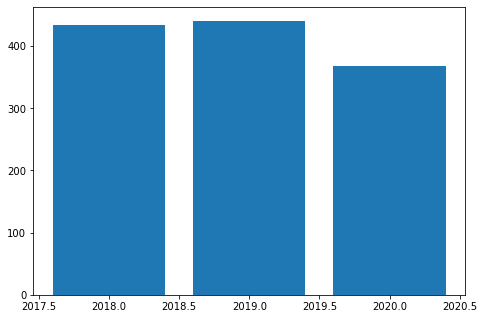

In [283]:
y = Project_df.drop_duplicates("Year").sort_values("Year", ascending= True)["Year"].tolist()

clients_by_end_of_year = Project_df.groupby('Year')

client_no_18 = pd.DataFrame(clients_by_end_of_year.get_group(2018))
client_no_18 = client_no_18.loc[Project_df.Month == 12]
client_no_18 = len(client_no_18["Client ID"])

client_no_19 = pd.DataFrame(clients_by_end_of_year.get_group(2019))
client_no_19 = client_no_19.loc[Project_df.Month == 12]
client_no_19 = len(client_no_19["Client ID"])

client_no_20 = pd.DataFrame(clients_by_end_of_year.get_group(2020))
client_no_20 = client_no_20.loc[Project_df.Month == 12]
client_no_20 = len(client_no_20["Client ID"])

client_no = [client_no_18, client_no_19, client_no_20]

clients_number = pd.DataFrame({'Year': y, 'Number of Clients': client_no})

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clients_number['Year'],clients_number['Number of Clients'])

plt.savefig("plots/Count of clients by the end of each Year.png")

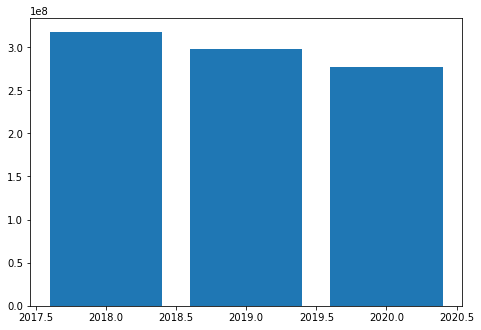

In [284]:
# Sum the Total Sales by Year
yearly_sales_df = pd.DataFrame(Project_df.groupby('Year')["Total Sales"].sum()).reset_index()
#.style.format('${0:,.2f}'))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(yearly_sales_df['Year'],yearly_sales_df['Total Sales'])

plt.savefig("plots/Total Sales by Year.png")

In [243]:
# Checking the number of different Locations
unique_locations = Project_df.drop_duplicates("Location")
locations_number = len(unique_locations["Location"])
locations_number

134

In [244]:
# Filtering the data by year to work with comparisons
Project_18_df = Project_df.loc[Project_df.Year == 2018]
Project_19_df = Project_df.loc[Project_df.Year == 2019]
Project_20_df = Project_df.loc[Project_df.Year == 2020]

In [245]:
# Working with 2018 Data by Category Sales
stats_summary_2018_df = (Project_18_df.groupby("Category")["Total Sales"].agg(["count","min","max","mean","median","var","std","sem"]).style.format('${0:,.2f}'))
stats_summary_2018_df

# Averiguar cómo darle formato a una sola columna - por ejemplo, que "count" no sea currency cómo todo lo
# demás, sino un entero

,count,min,max,mean,median,var,std,sem
Category,,,,,,,,
C1,"$1,297.00",$0.00,"$266,897.00","$19,329.37","$15,882.00","$280,700,450.39","$16,754.12",$465.21
C2,"$1,679.00",$0.00,"$883,310.00","$32,854.53","$28,279.00","$1,099,445,958.73","$33,157.89",$809.21
C3,$831.00,$319.00,"$250,064.00","$53,197.03","$48,830.00","$883,855,335.33","$29,729.70","$1,031.31"
C4,$579.00,$0.00,"$714,675.00","$95,441.40","$86,407.00","$3,431,020,736.59","$58,574.92","$2,434.29"
C5,$226.00,"$2,590.00","$471,584.00","$140,004.55","$139,181.50","$4,078,173,565.60","$63,860.58","$4,247.94"
C6,$343.00,$0.00,"$1,817,422.00","$311,277.50","$269,100.00","$38,392,288,815.20","$195,939.50","$10,579.74"


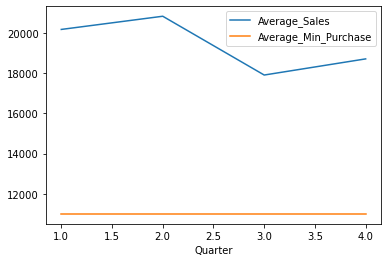

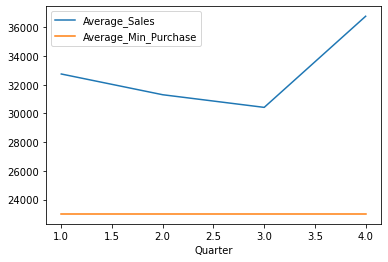

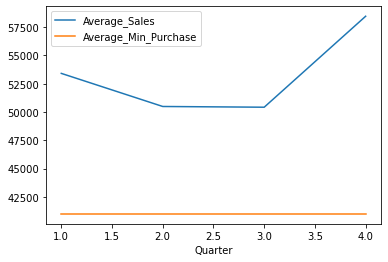

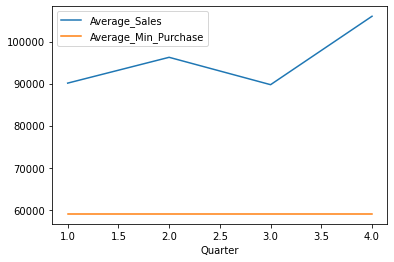

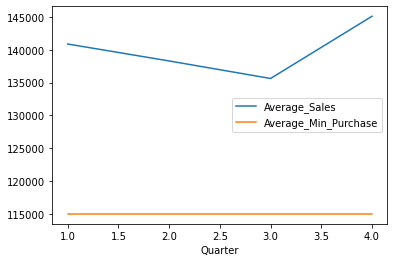

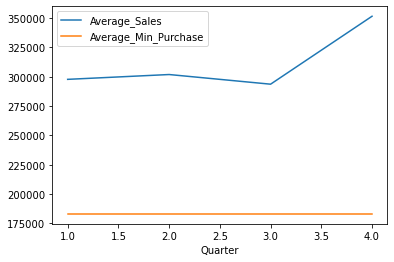

In [265]:
# Creating Data Frames for ploting Avg Quarterly Sales vs Avg Min Monthly Sales by Category 
c = Project_df.drop_duplicates("Category").sort_values("Category", ascending= True)["Category"].tolist()
q = Project_df.drop_duplicates("Quarter").sort_values("Quarter", ascending= True)["Quarter"].tolist()

categories = []
quarters = []
sales18 = []
min18 = []

for x in c:
    for y in q:
        quarter_category_sales_18 = Project_18_df.groupby(['Category', 'Quarter'])
        a = (x,y)
        b = quarter_category_sales_18.get_group(a)["Total Sales"].mean()
        c = quarter_category_sales_18.get_group(a)["Min Monthly Sales"].mean()
        categories.append(x)
        quarters.append(y)
        sales18.append(b)
        min18.append(c)
        
sales_avg_plot18 = pd.DataFrame({'Category': Categories, 'Quarter': Quarters, 'Average_Sales': sales18, 'Average_Min_Purchase': min18}).set_index("Category")
c1 = sales_avg_plot18.loc["C1",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c2 = sales_avg_plot18.loc["C2",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c3 = sales_avg_plot18.loc["C3",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c4 = sales_avg_plot18.loc["C4",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c5 = sales_avg_plot18.loc["C5",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c6 = sales_avg_plot18.loc["C6",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")

x_axis = np.arange(len(sales_avg_plot18))
tick_quarters = [value for value in x_axis]

#sns.set_theme(style="darkgrid")
#sns.displot(
#    sales_sum_plot18, x="Quarter", col="Total_Sales", row="Category",
#    binwidth=3, height=3, facet_kws=dict(margin_titles=True),)
#Checar por qué marca error "AttributeError: module 'seaborn' has no attribute 'set_theme'"

c1.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2018 (C1).png")
c2.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2018 (C2).png")
c3.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2018 (C3).png")
c4.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2018 (C4).png")
c5.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2018 (C5).png")
c6.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2018 (C6).png")

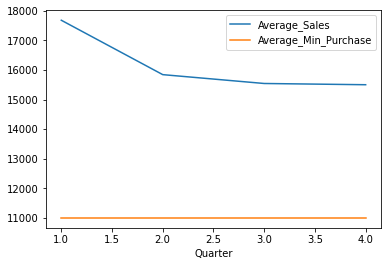

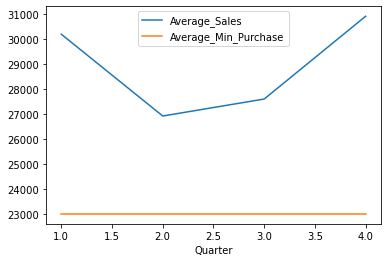

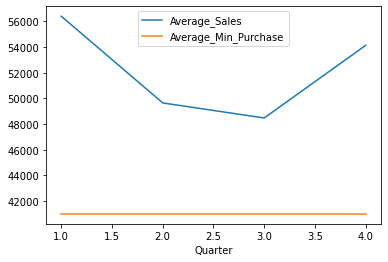

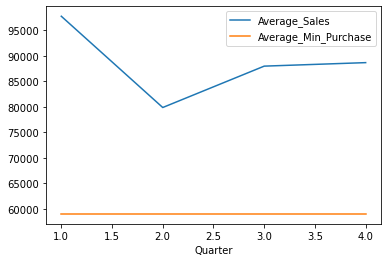

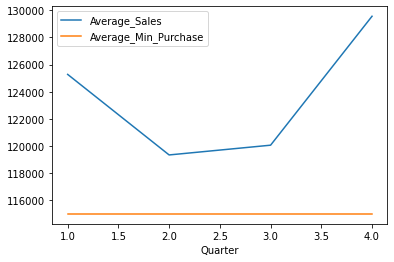

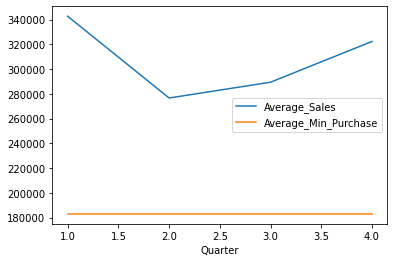

In [249]:
# Creating Data Frames for ploting Avg Quarterly Sales vs Avg Min Monthly Sales by Category 
c = Project_df.drop_duplicates("Category").sort_values("Category", ascending= True)["Category"].tolist()
q = Project_df.drop_duplicates("Quarter").sort_values("Quarter", ascending= True)["Quarter"].tolist()

categories = []
quarters = []
sales19 = []
min19 = []

for x in c:
    for y in q:
        quarter_category_sales_19 = Project_19_df.groupby(['Category', 'Quarter'])
        a = (x,y)
        b = quarter_category_sales_19.get_group(a)["Total Sales"].mean()
        c = quarter_category_sales_19.get_group(a)["Min Monthly Sales"].mean()
        categories.append(x)
        quarters.append(y)
        sales19.append(b)
        min19.append(c)
        
sales_avg_plot19 = pd.DataFrame({'Category': Categories, 'Quarter': Quarters, 'Average_Sales': sales19, 'Average_Min_Purchase': min19}).set_index("Category")
c1 = sales_avg_plot19.loc["C1",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c2 = sales_avg_plot19.loc["C2",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c3 = sales_avg_plot19.loc["C3",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c4 = sales_avg_plot19.loc["C4",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c5 = sales_avg_plot19.loc["C5",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c6 = sales_avg_plot19.loc["C6",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")

c1.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2019 (C1).png")
c2.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2019 (C2).png")
c3.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2019 (C3).png")
c4.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2019 (C4).png")
c5.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2019 (C5).png")
c6.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2019 (C6).png")

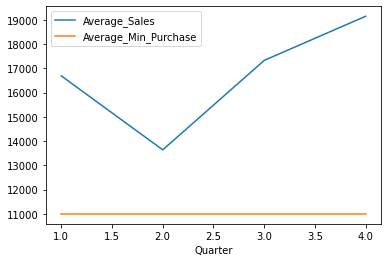

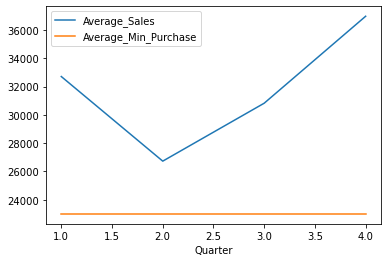

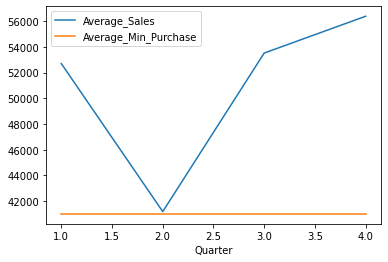

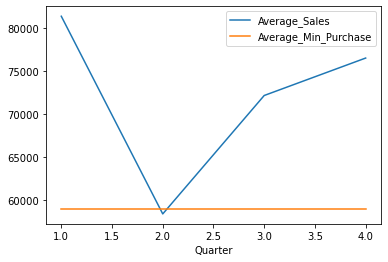

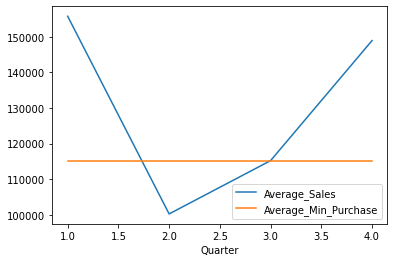

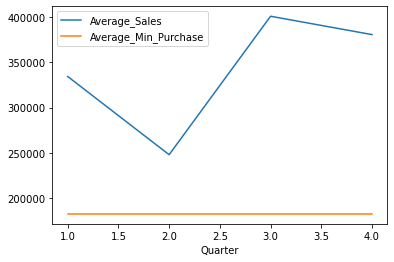

In [250]:
# Creating Data Frames for ploting Avg Quarterly Sales vs Avg Min Monthly Sales by Category 
c = Project_df.drop_duplicates("Category").sort_values("Category", ascending= True)["Category"].tolist()
q = Project_df.drop_duplicates("Quarter").sort_values("Quarter", ascending= True)["Quarter"].tolist()

categories = []
quarters = []
sales20 = []
min20 = []

for x in c:
    for y in q:
        quarter_category_sales_20 = Project_20_df.groupby(['Category', 'Quarter'])
        a = (x,y)
        b = quarter_category_sales_20.get_group(a)["Total Sales"].mean()
        c = quarter_category_sales_20.get_group(a)["Min Monthly Sales"].mean()
        categories.append(x)
        quarters.append(y)
        sales20.append(b)
        min20.append(c)
        
sales_avg_plot20 = pd.DataFrame({'Category': Categories, 'Quarter': Quarters, 'Average_Sales': sales20, 'Average_Min_Purchase': min20}).set_index("Category")
c1 = sales_avg_plot20.loc["C1",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c2 = sales_avg_plot20.loc["C2",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c3 = sales_avg_plot20.loc["C3",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c4 = sales_avg_plot20.loc["C4",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c5 = sales_avg_plot20.loc["C5",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")
c6 = sales_avg_plot20.loc["C6",["Quarter", "Average_Sales", "Average_Min_Purchase"]].set_index("Quarter")

c1.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2020 (C1).png")
c2.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2020 (C2).png")
c3.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2020 (C3).png")
c4.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2020 (C4).png")
c5.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2020 (C5).png")
c6.plot.line()
plt.savefig("plots/Average Sales vs Average Min Purchase 2020 (C6).png")